In [1]:
import kagglehub 

/home/ujjwal/ujjwal/Hybrid-Recommender-system/recom-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#download the datasets 
kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

100%|██████████| 639M/639M [01:54<00:00, 5.83MB/s] 

Extracting files...


'/home/ujjwal/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1'

In [41]:
import os 
from pathlib import Path 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [48]:
from pathlib import Path

data_path = Path("~/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1").expanduser()


In [49]:
for file in Path.iterdir(data_path):
    print(file)


/home/ujjwal/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1/User Listening History.csv
/home/ujjwal/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1/MP3-Example
/home/ujjwal/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1/Music Info.csv


In [50]:
songs_data_path = data_path / 'Music Info.csv'
users_data_path = data_path / 'User Listening History.csv'

In [51]:
#load the songs 
df_songs= pd.read_csv(songs_data_path)
df_songs.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [52]:
#size of dataset 
print("size" ,df_songs.shape)
print()
print("data info" , df_songs.info())

size (50683, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness      

In [53]:
#drop collumsn 
columns_to_drop= ["spotify_preview_url"]
df_songs.drop(columns= columns_to_drop, inplace= True)
df_songs.columns == "spotify_preview_url"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

Missing values 

In [59]:
print(df_songs.isnull().sum())

track_id                0
name                    0
artist                  0
spotify_id              0
tags                 1127
genre               28335
year                    0
duration_ms             0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64


<Axes: >

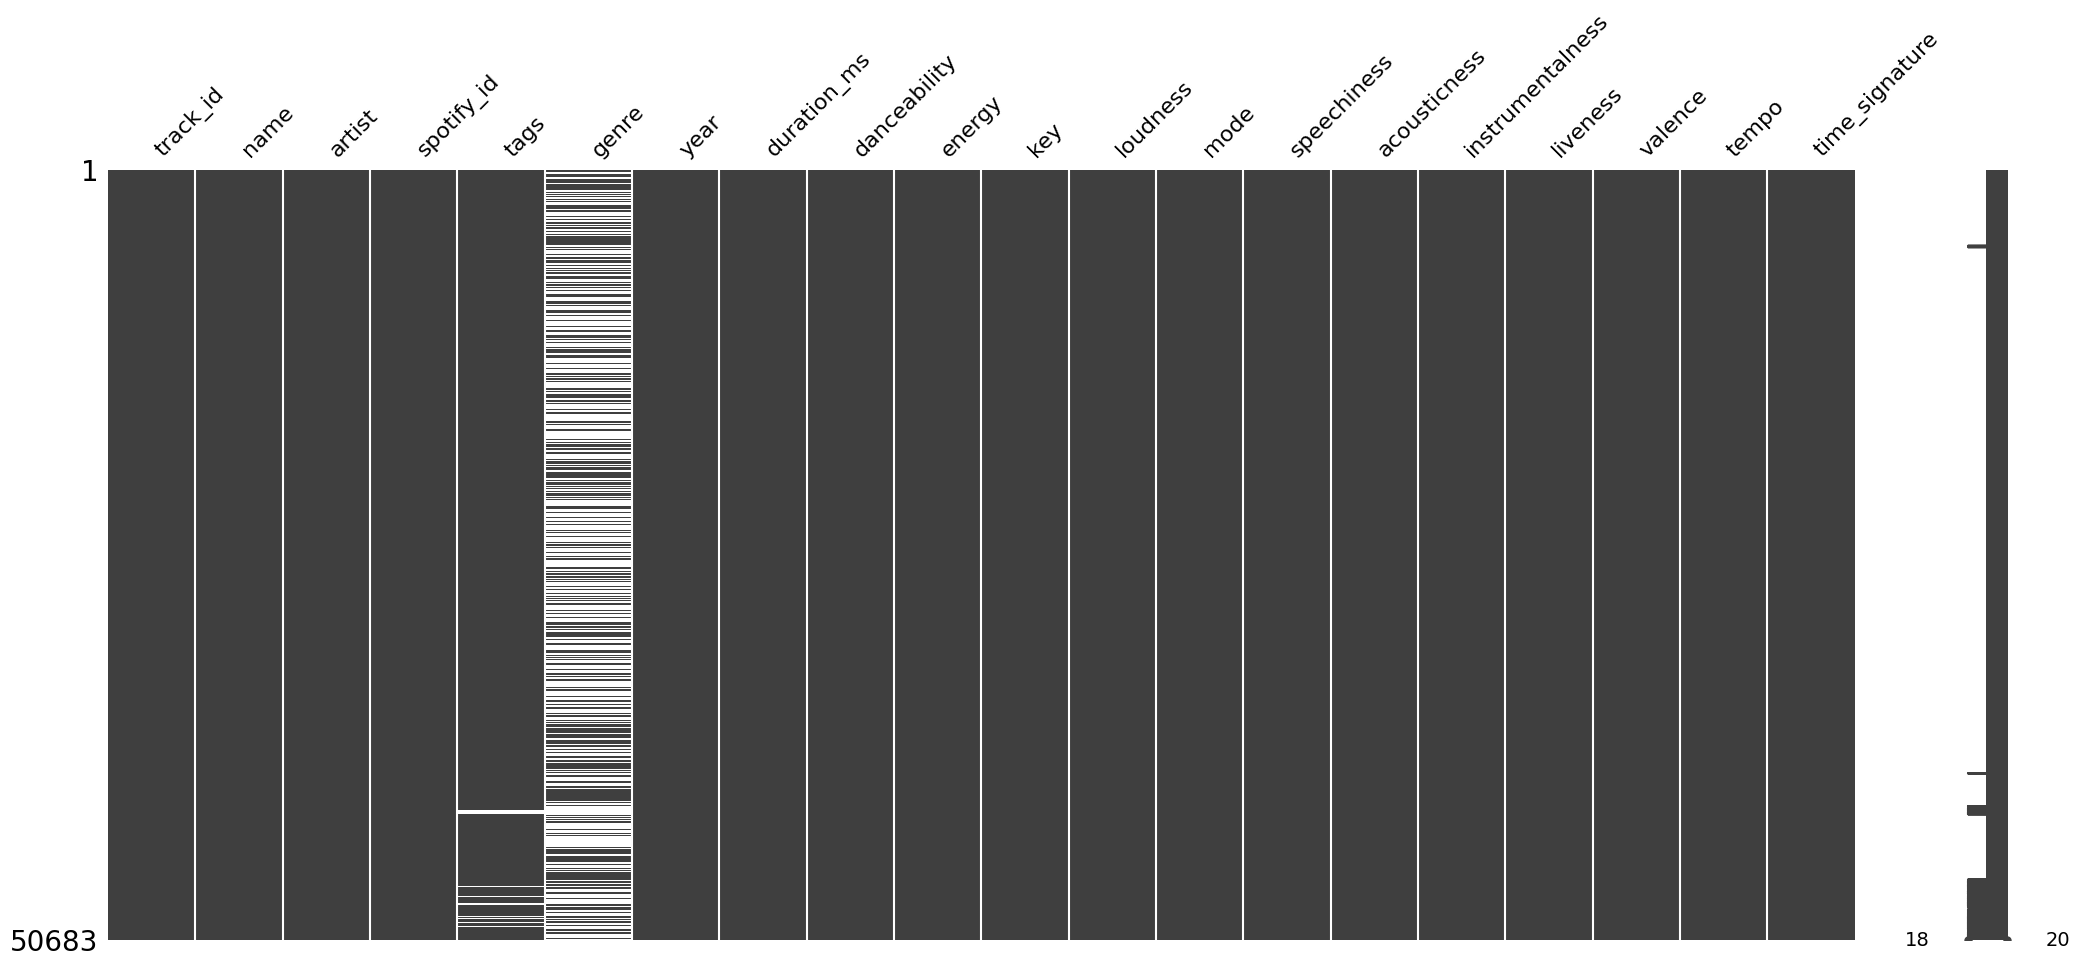

In [61]:
import missingno as msno 
msno.matrix(df_songs)


<Axes: >

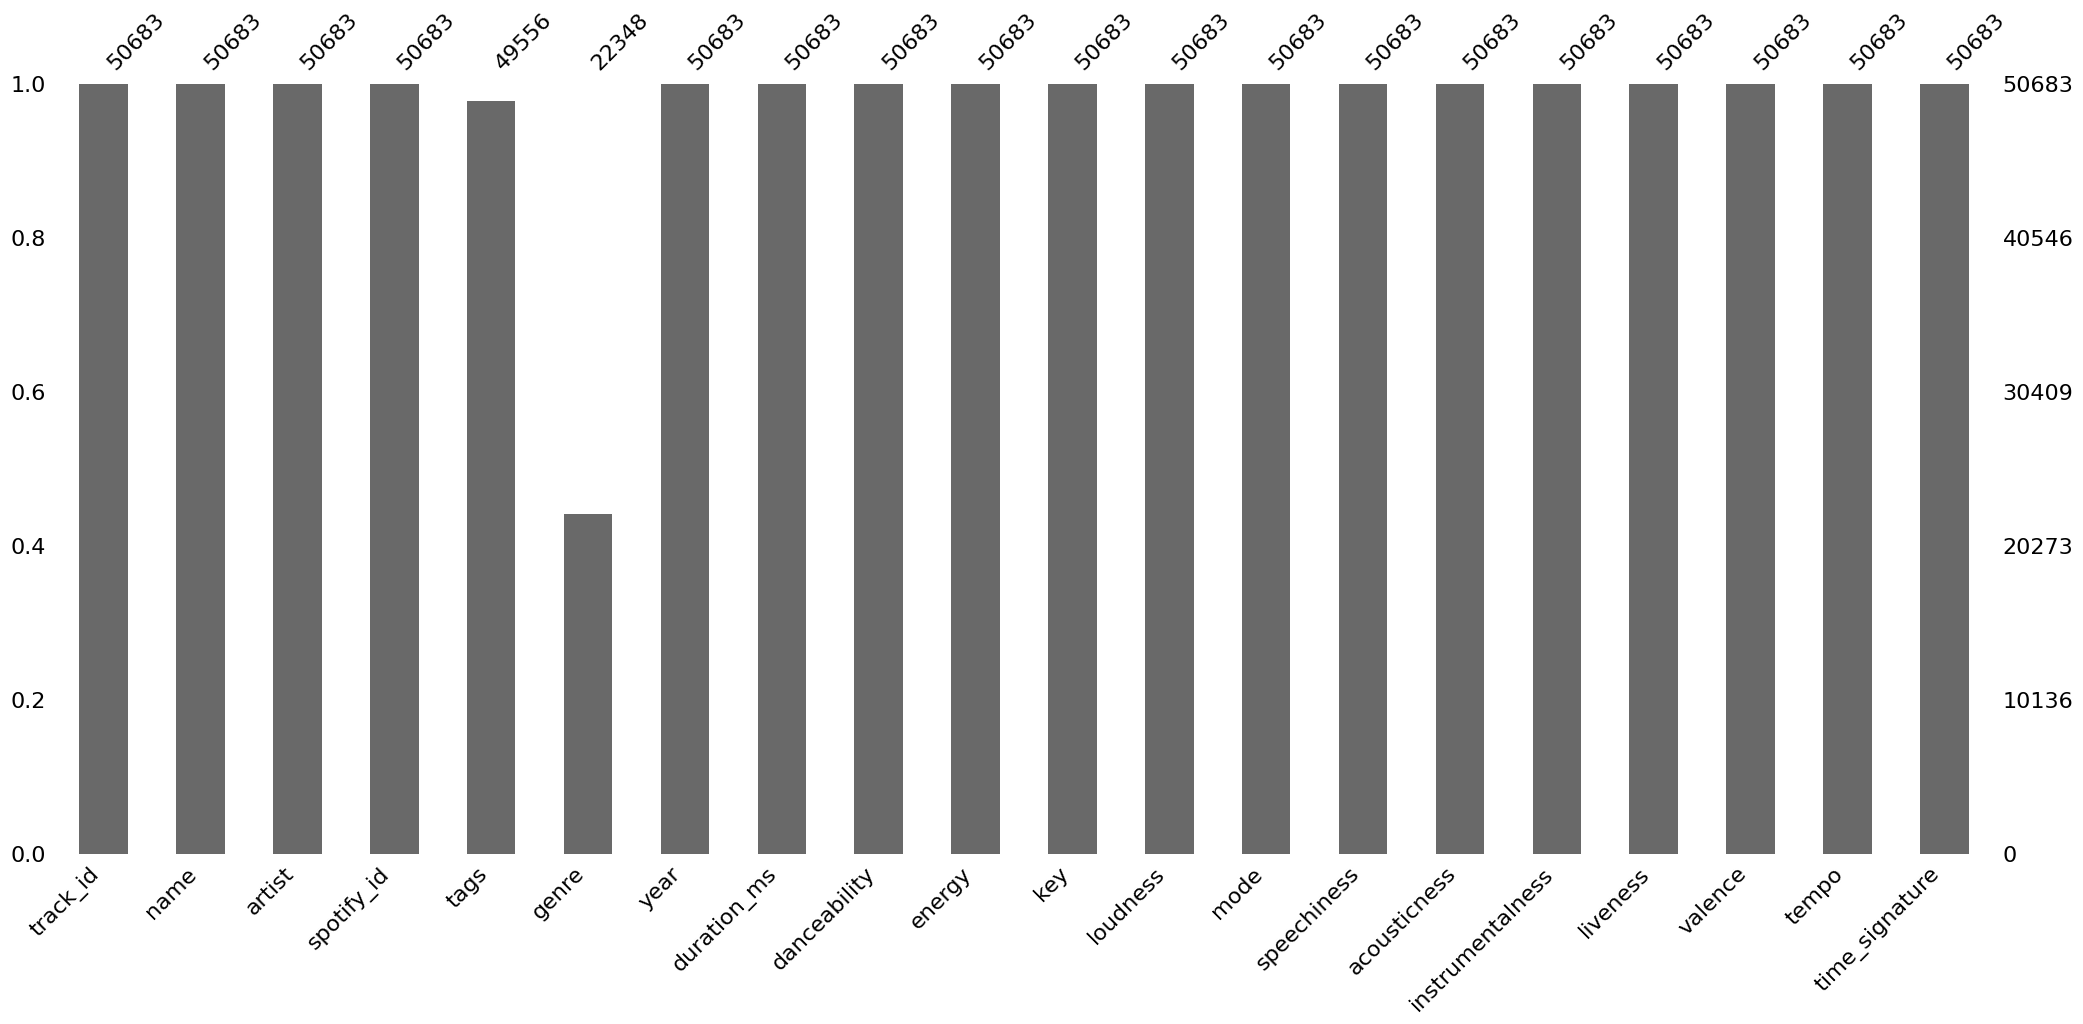

In [63]:
msno.bar(df_songs)

In [74]:
df_songs.duplicated(subset='name').sum()

np.int64(0)

In [ ]:
## check for the duplicate based on the name of the songs
(
df_songs
    .assign(name=df_songs['name'].str.lower()) ##### convert name columns value  into lowercase 
    .duplicated(subset='name')
    .sum()
)

np.int64(815)

### There are 815 duplicate row based on the name of the songs 